<a href="https://colab.research.google.com/github/Vey27/Applied-Data-Science/blob/main/Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Advertising

 dataset captures the sales revenue generated wtih respect to advertisement costs across multiple channels like radio, tv, and newspaper. Using linear regression to understand how spending on advertisements impacts sales.

In [45]:
#import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

# Linear Regression

In [46]:
#load data 
df = pd.read_csv('Advertising.csv')
df.head(10) # view 10 rows of data


,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [47]:
# Drop the "Unnamed: 0" column
df = df.drop('Unnamed: 0', axis=1)

In [48]:
# Print the updated DataFrame
print(df.head(10))

   TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)  Sales ($)
0             230.1                 37.8                     69.2       22.1
1              44.5                 39.3                     45.1       10.4
2              17.2                 45.9                     69.3        9.3
3             151.5                 41.3                     58.5       18.5
4             180.8                 10.8                     58.4       12.9
5               8.7                 48.9                     75.0        7.2
6              57.5                 32.8                     23.5       11.8
7             120.2                 19.6                     11.6       13.2
8               8.6                  2.1                      1.0        4.8
9             199.8                  2.6                     21.2       10.6


In [49]:
# Rename the columns
df = df.rename(columns={
    'TV Ad Budget ($)': 'TV',
    'Radio Ad Budget ($)': 'Radio',
    'Newspaper Ad Budget ($)': 'Newspaper',
    'Sales ($)': 'Sales'
})

# Print the updated DataFrame
print(df)


        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3    9.3
3    151.5   41.3       58.5   18.5
4    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1    9.7
197  177.0    9.3        6.4   12.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   13.4

[200 rows x 4 columns]


<Axes: >

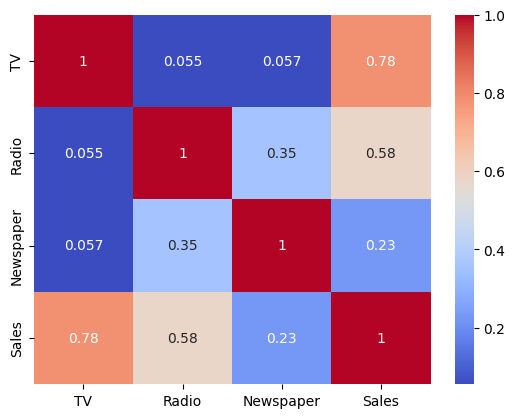

In [51]:
#Plot heatmap
correlation_matrix = df.corr()

# Create a correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


In the heatmap plot, the correlation values between the "Sales" and other variables are as follows: 

- "TV": 0.78
- "Radio": 0.58
- "Newspaper": 0.23

Based on these correlation values, we can conclude that "TV" has the highest correlation with "Sales" among the variables.

In [18]:
df.shape

(200, 4)

In [21]:
# Check the data , there should be no missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


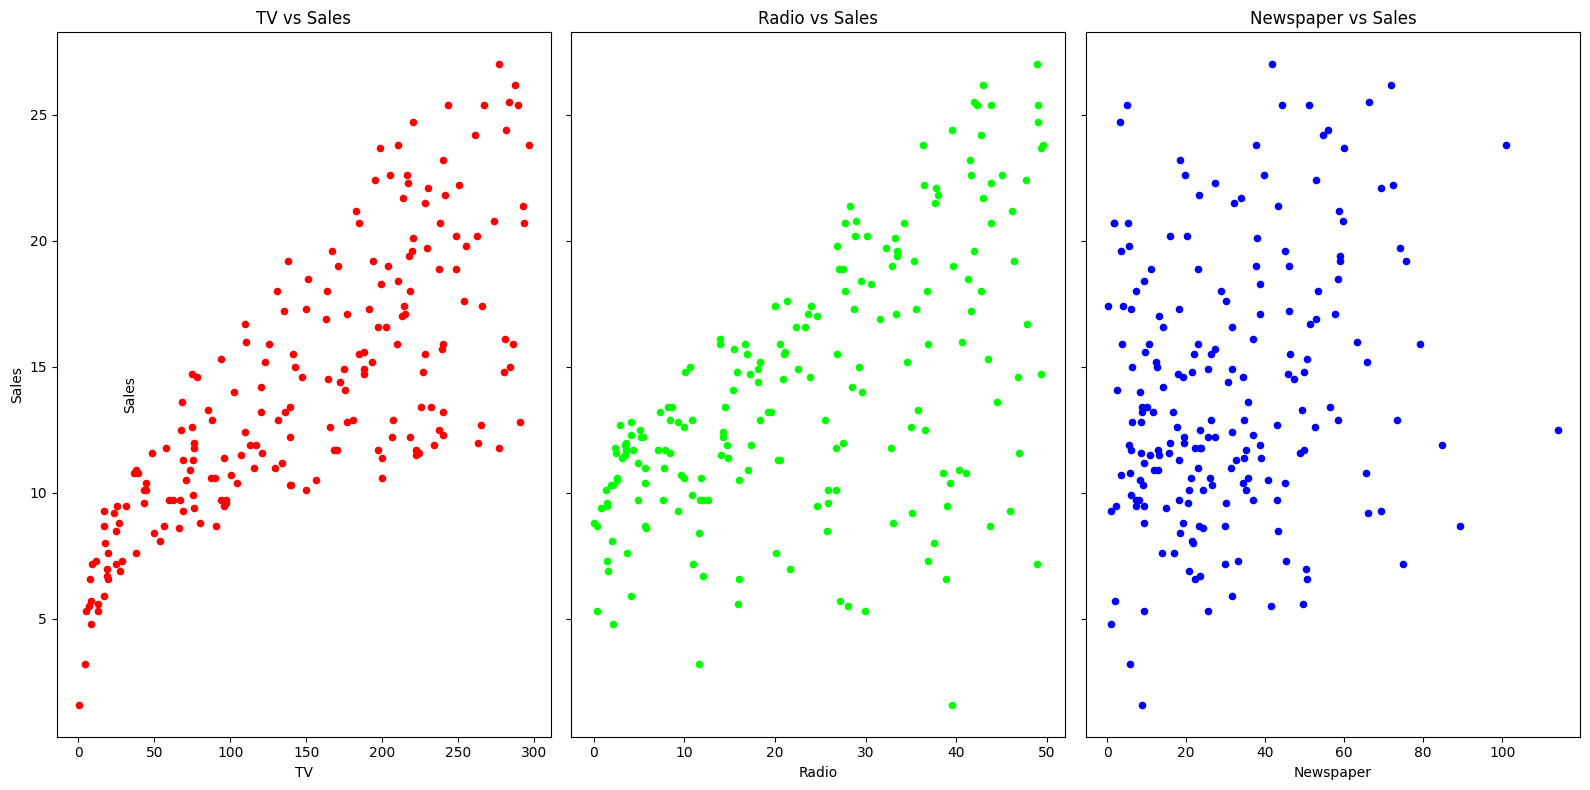

In [24]:
# Create a color palette
colors = ['#FF0000', '#00FF00', '#0000FF']

# Create a marker style
marker = 'o'

# Create the figure and axes
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 8))

# Set the title for each subplot
axs[0].set_title('TV vs Sales')
axs[1].set_title('Radio vs Sales')
axs[2].set_title('Newspaper vs Sales')

# Customize each scatter plot
df.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], color=colors[0], marker=marker)
df.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1], color=colors[1], marker=marker)
df.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2], color=colors[2], marker=marker)

# Set the common y-axis label
fig.text(0.08, 0.5, 'Sales', va='center', rotation='vertical')

# Show the plot
plt.tight_layout()
plt.show()


In [26]:
feature_cols = ['TV']
x = df[feature_cols] #independent variable 
y = df.Sales #dependent variable 

In [27]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() #initialize the model
lm.fit(x,y) #fitting the model in x and y

LinearRegression()

In [28]:
print(lm.intercept_) #print the intercept and coefficient
print(lm.coef_)

7.032593549127695
[0.04753664]


The code provided prints the intercept and coefficient(s) of a linear regression model stored in the variable `lm`.

- `lm.intercept_` represents the intercept of the linear regression model. In this case, the intercept is approximately 7.032593549127695.
- `lm.coef_` represents the coefficient(s) of the linear regression model for the predictor variable(s). In this case, there is only one coefficient, which is approximately 0.04753664.

In [29]:
X_new = pd.DataFrame({'TV':[50]})
X_new.head()

,TV
0,50


- The DataFrame X_new consists of a single row with the value 50 in the 'TV' column

In [30]:
lm.predict(X_new)

array([9.40942557])

The code `lm.predict(X_new)` is using the trained linear regression model (`lm`) to make a prediction on the data provided in `X_new`. 

The result of `lm.predict(X_new)` is an array with a single element: `[9.40942557]`. This is the predicted 'Sales' value for the input 'TV' value of 50, according to the trained linear regression model.

In [33]:
X_new = pd.DataFrame({'TV': [df.TV.min(),df.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


- New DataFrame called X_new with two rows. The 'TV' column in X_new contains the minimum and maximum values from the 'TV' column of the original DataFrame df.

In [34]:
preds = lm.predict(X_new)
preds

array([ 7.0658692 , 21.12245377])

This means that for the minimum 'TV' value of 0.7, the predicted value for the response variable is approximately 7.066. Similarly, for the maximum 'TV' value of 296.4, the predicted value for the response variable is approximately 21.122.


In [39]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='Sales ~ TV', data=df).fit()


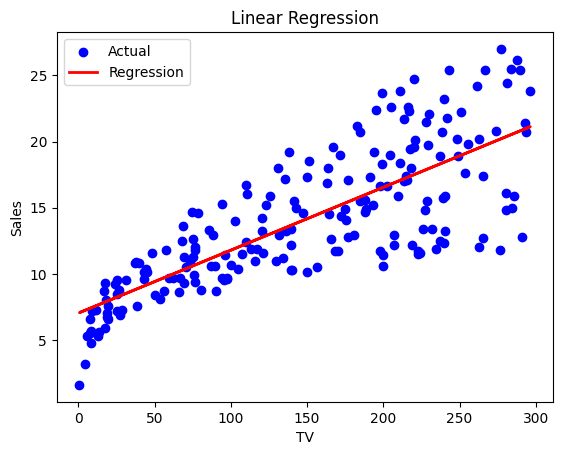

In [41]:
lm = smf.ols(formula='Sales ~ TV', data=df).fit()

# Scatter plot of the data
plt.scatter(df['TV'], df['Sales'], color='blue', label='Actual')

# Regression line
plt.plot(df['TV'], lm.predict(df['TV']), color='red', linewidth=2, label='Regression')

# Add labels and title
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Linear Regression')
plt.legend()

# Display the plot
plt.show()


###In the given plot:

- "Actual" refers to the actual observed values of the dependent variable (Sales) corresponding to the values of the independent variable (TV) from the dataset. These are represented by the blue scatter plot markers.
- "Regression" refers to the predicted values of the dependent variable (Sales) based on the linear regression model fit using the data. The regression line, represented by the red line, shows the estimated relationship between the independent variable (TV) and the dependent variable (Sales) according to the regression model.

The plot visualizes the relationship between TV advertising budget and sales, with the scatter plot showing the actual data points and the regression line representing the estimated linear relationship between the variables.

In [40]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


The code `lm.conf_int()` is used to calculate the confidence intervals for the coefficients of the linear regression model (`lm`). 

The output you provided suggests that there are two coefficients being considered: Intercept and TV. For each coefficient, the code calculates the lower and upper bounds of the confidence interval. The interpretation of the values is as follows:

- For the Intercept coefficient:
  - The lower bound of the confidence interval is 6.129719.
  - The upper bound of the confidence interval is 7.935468.

- For the TV coefficient:
  - The lower bound of the confidence interval is 0.042231.
  - The upper bound of the confidence interval is 0.052843.

These confidence intervals provide a range of plausible values for the coefficients. The interpretation is that we can be confident (at a certain level of confidence, usually specified as a percentage, e.g., 95%) that the true values of the coefficients fall within these intervals.

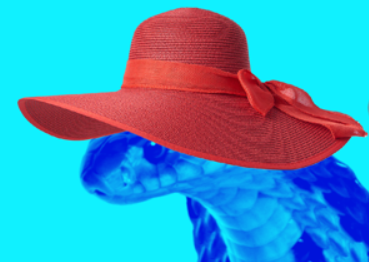